In [45]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [46]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"

# tags = ['2024-04-12-15-31-26']
# filters = {"tags": {"$in": tags}}
tags = ["2024-05-04-20-08-48"]
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [47]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

# filter out runs with Evaluation/Mean_Returns == -100
df = df[df['Evaluation/Mean_Returns'] != -100]

ncols, nrows = df["ncols"][0], 4
df

100%|██████████| 12/12 [00:00<00:00, 71902.35it/s]


,Evaluation/Returns,Evaluation/Mean_Returns,_wandb,trajectories,Evaluation/Mean_Discounted_Returns,_runtime,_timestamp,Evaluation/Timesteps,Evaluation/Entropies,Evaluation/Mean_Entropy,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'bins': [0.5, 0.515625, 0.53125, 0.546875, 0....",1.00,{'runtime': 36},"[[0, 4, 8, 9, 10, 14], [0, 1, 2, 6, 10, 14], [...",0.585235,37.971361,1.714847e+09,"{'_type': 'histogram', 'bins': [6, 6.03125, 6....","{'bins': [0.42147281765937805, 0.4241239726543...",0.470704,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
1,"{'_type': 'histogram', 'bins': [0.5, 0.515625,...",1.00,{'runtime': 25},"[[0, 1, 2, 3, 3, 3, 2, 3, 2, 6, 10, 14], [0, 0...",0.400863,26.372565,1.714847e+09,"{'_type': 'histogram', 'values': [23, 0, 0, 10...","{'_type': 'histogram', 'bins': [0.448069125413...",0.617433,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
2,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...",0.15,{'runtime': 194},"[[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0,...",0.010484,195.337826,1.714847e+09,"{'_type': 'histogram', 'bins': [8, 9.4375, 10....","{'_type': 'histogram', 'bins': [0.768077433109...",0.942944,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
3,"{'_type': 'histogram', 'bins': [0.5, 0.515625,...",1.00,{'runtime': 21},"[[0, 1, 2, 6, 10, 14], [0, 4, 8, 9, 13, 14], [...",0.478406,23.179477,1.714846e+09,"{'_type': 'histogram', 'bins': [6, 6.53125, 7....","{'values': [1, 0, 0, 0, 3, 0, 4, 3, 4, 6, 8, 7...",0.583859,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
4,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...",0.98,{'runtime': 32},"[[0, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",0.241682,34.119455,1.714846e+09,"{'_type': 'histogram', 'bins': [6, 7.46875, 8....","{'_type': 'histogram', 'bins': [0.478474885225...",0.669628,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
5,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...",0.22,{'runtime': 84},"[[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,...",0.006359,85.581470,1.714846e+09,"{'_type': 'histogram', 'bins': [13, 14.359375,...","{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.925532,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
6,"{'_type': 'histogram', 'bins': [0.5, 0.515625,...",1.00,{'runtime': 12},"[[0, 4, 8, 9, 10, 14], [0, 1, 2, 6, 10, 14], [...",0.445722,13.722018,1.714846e+09,"{'_type': 'histogram', 'bins': [6, 6.765625, 7...","{'bins': [0.48542332649230957, 0.4898148179054...",0.602936,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
7,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...",0.75,{'runtime': 26},"[[0, 0, 0, 4, 0, 0, 0, 1, 2, 3, 3, 2, 6, 10, 1...",0.207140,27.502821,1.714846e+09,"{'_type': 'histogram', 'bins': [6, 7.46875, 8....","{'bins': [0.5139517784118652, 0.51927280426025...",0.729174,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
8,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...",0.23,{'runtime': 41},"[[0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,...",0.022660,41.889765,1.714846e+09,"{'_type': 'histogram', 'bins': [8, 9.4375, 10....","{'_type': 'histogram', 'bins': [0.873342394828...",0.942206,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
9,"{'bins': [0.5, 0.515625, 0.53125, 0.546875, 0....",1.00,{'runtime': 11},"[[0, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,...",0.420096,12.279633,1.714846e+09,"{'bins': [6, 7.390625, 8.78125, 10.171875, 11....","{'_type': 'histogram', 'bins': [0.345302134752...",0.551783,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity


In [48]:
# filter out 128 planning budget
# Assuming 'df' is your DataFrame
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

# Group the DataFrame by both 'policy_combination' and 'planning_budget'
grouped = df.groupby(['policy_combination', 'planning_budget'])['trajectories']


# Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()
aggregated_trajectories


policy_combination  planning_budget
mvc+PolicyUCT       16                 [[0, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,...
                    32                 [[0, 4, 8, 9, 10, 14], [0, 1, 2, 6, 10, 14], [...
                    64                 [[0, 1, 2, 6, 10, 14], [0, 4, 8, 9, 13, 14], [...
                    128                [[0, 4, 8, 9, 10, 14], [0, 1, 2, 6, 10, 14], [...
mvc+UCT             16                 [[0, 4, 8, 9, 13, 14], [0, 0, 4, 0, 0, 1, 2, 2...
                    32                 [[0, 0, 0, 4, 0, 0, 0, 1, 2, 3, 3, 2, 6, 10, 1...
                    64                 [[0, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,...
                    128                [[0, 1, 2, 3, 3, 3, 2, 3, 2, 6, 10, 14], [0, 0...
visit+UCT           16                 [[0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4, 0,...
                    32                 [[0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,...
                    64                 [[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 

In [49]:
# # remove all trajectories with a length of 100
# print(aggregated_trajectories.apply(lambda x: len(x)).sum())
# filtered_aggregated_trajectories = aggregated_trajectories.apply(lambda x: [traj for traj in x if len(traj) != 100])
# # check the total number of trajectories
# filtered_aggregated_trajectories.apply(lambda x: len(x)).sum()

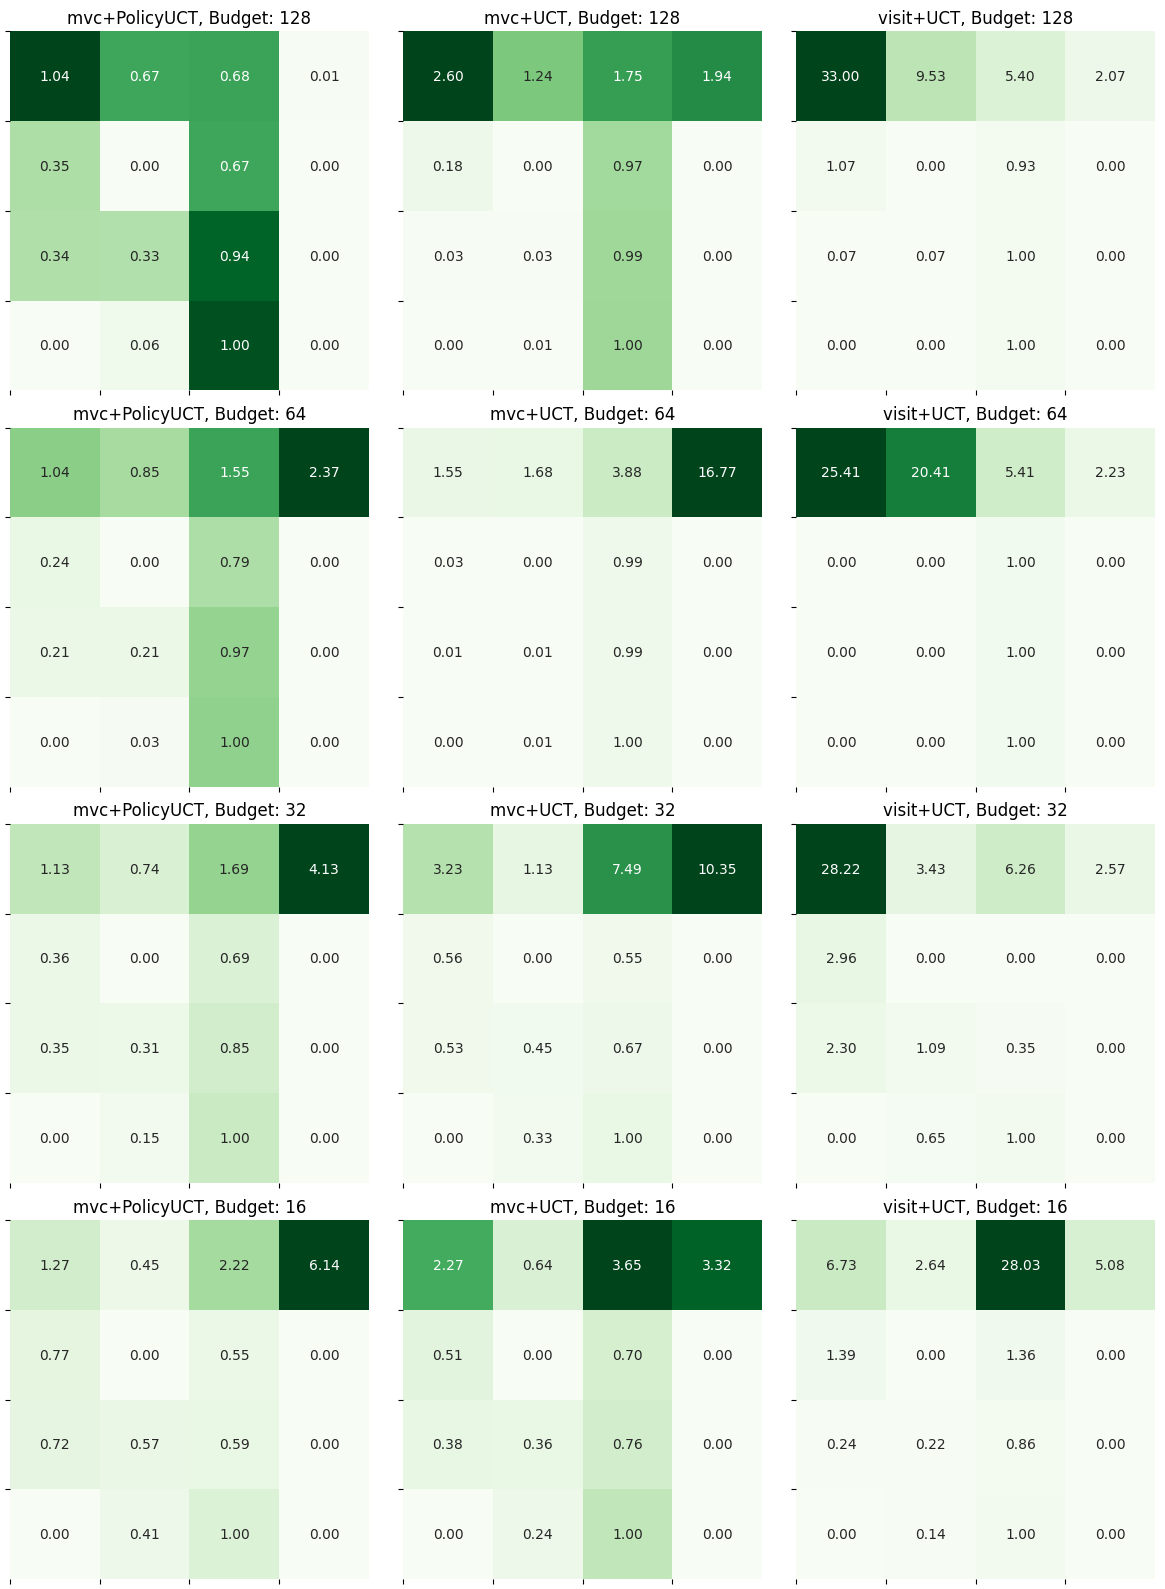

In [54]:
# Define functions to calculate coordinates and density
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density

# Determine the number of unique policy combinations and planning budgets
n_policies = len(df['policy_combination'].unique())
n_budgets = len(df['planning_budget'].unique())

# Prepare the plot
fig, axs = plt.subplots(n_budgets, n_policies, figsize=(ncols * n_policies, nrows * n_budgets))

# Plot each subgroup
for (policy_combination, planning_budget), trajectories in filtered_aggregated_trajectories.items():
    i = df['planning_budget'].unique().tolist().index(planning_budget)
    j = df['policy_combination'].unique().tolist().index(policy_combination)
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    ax = axs[i][j] if n_budgets > 1 and n_policies > 1 else axs
    sns.heatmap(density, ax=ax, cmap='Greens', cbar=False, annot=True, fmt='.2f')
    ax.set_xticks(range(ncols))
    ax.set_yticks(range(nrows))
    ax.set_aspect('equal')  # Set aspect ratio to be equal, making each cell square
    # set subtitle
    ax.set_title(f"{policy_combination}, Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/4x4lake_heurstic_density.pdf")
plt.show()


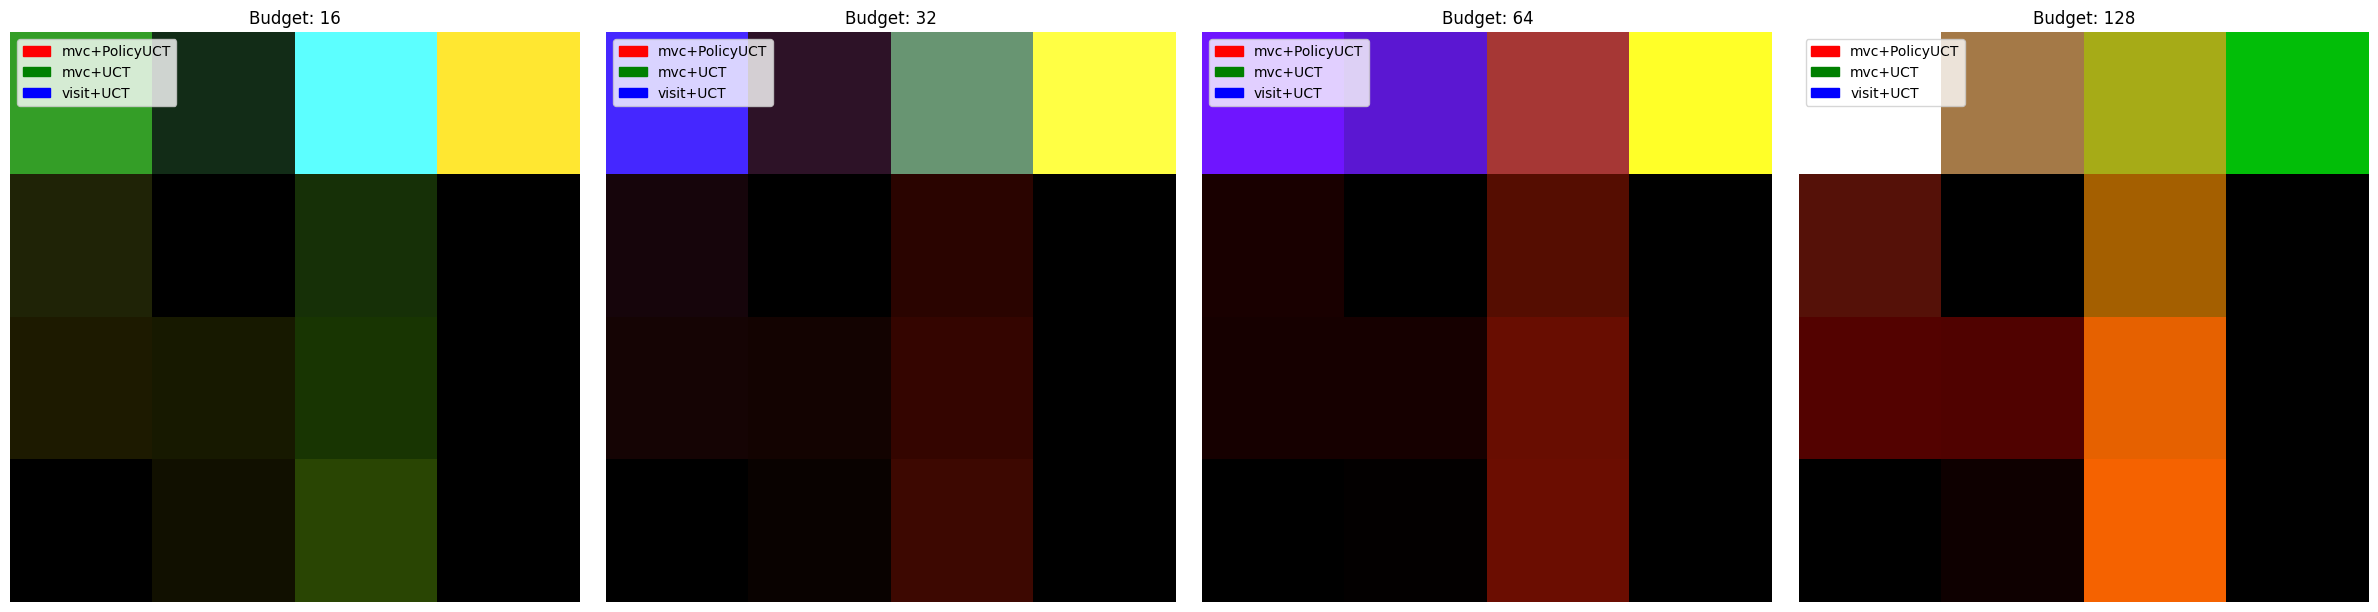

In [51]:
import matplotlib.patches as mpatches
grouped = df.groupby(['planning_budget', 'policy_combination'])['trajectories'].sum()


# Determine the number of unique planning budgets
n_budgets = len(grouped.index.get_level_values(0).unique())

# Prepare a single figure with multiple subplots (one for each planning_budget)
fig, axs = plt.subplots(1, n_budgets, figsize=(6 * n_budgets, 6))

# Iterate over each planning_budget and create RGB heatmaps
for idx, (planning_budget, budget_group) in enumerate(grouped.groupby(level=0)):
    rgb_image = np.zeros((nrows, ncols, 3))  # Initialize RGB layers
    colors = ['Red', 'Green', 'Blue']  # Map trajos keys to RGB channels
    channel_colors = {name: color for name, color in zip(budget_group.index.get_level_values(1), colors)}

    # Compute density for each policy combination and assign to RGB channels
    for jdx, ((_, policy_combination), trajectories) in enumerate(budget_group.items()):
        density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
        norm_density = density / np.max(density, where=(density!=0), initial=1)  # Normalize avoiding division by zero
        rgb_image[:, :, jdx % 3] += norm_density  # Accumulate in RGB layers, repeating colors if more than 3 policies

    ax = axs[idx] if n_budgets > 1 else axs
    ax.imshow(rgb_image, aspect='equal')
    ax.axis('off')  # Hide grid lines and labels

    # Create a legend
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in channel_colors.items()]
    ax.legend(handles=legend_patches, loc='upper left')
    ax.set_title(f"Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/dist_training_cliff_rgb.pdf")
plt.show()

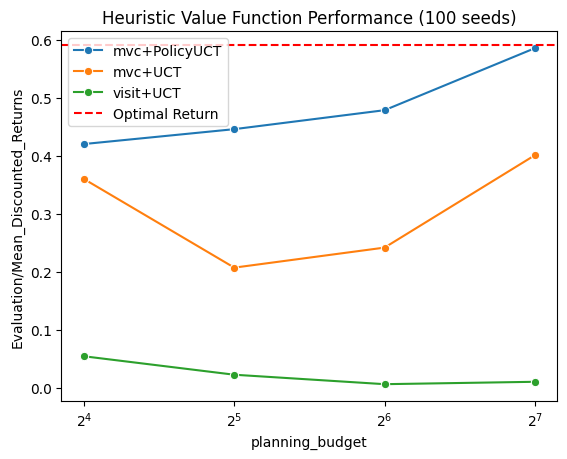

In [53]:
# plot Evaluation/Mean_Discounted_Returns from df vs planning_budget for each policy_combination

sns.lineplot(data=df, x='planning_budget', y='Evaluation/Mean_Discounted_Returns', hue='policy_combination', marker='o')
optimal_value = df["optimal_value"][0]
plt.axhline(optimal_value, color='red', linestyle='--', label='Optimal Return')
# set x axis to log2 scale
plt.xscale('log', base=2)
plt.legend()
plt.title('Heuristic Value Function Performance (100 seeds)')
plt.savefig("outfiles/4x4heuristic_value_function_performance.pdf")
plt.show()
